# Generating Plots for the Choose Model

This notebook showcases how the bifuraction plots for the choose model of swarm adaptation were generated (**including the data files**). Since this model is completely solvable analytically, we use the analytical results for the bifuraction plot.

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

init_printing()

x, Pe, Pm, v, delta, N, v1, v0, rho, sigma = symbols('x P_e P_m v delta N v_1 v_0 rho, sigma')

## Definition and Analysis of the System

Complete details of this section can be found in another document

In [2]:
f = Pe*v1*(1-x) + Pm*v0*N*(1-x)*x/(1+Pm*N*(1-x)) - Pm*v1*N*x*(1-x)/(1+Pm*N*x)
F = f.subs([(v0, v+delta), (v1,v)])

R = solve(F,x)

J = diff(F,x)

J0 = [J.subs(x,R[i]) for i in range(len(R))]

## Generating the Data and the Plots

Each code segment in this group can be run independent of each other as long as the code segements in the previous sections have been sun sequetially.

**Note**: In the plots that follow: 
1. Red points represent unstable fixed points or regions of no adaptation
2. Blue points represent stable fixed points or regions of adaptation

### Fixed Points as a function of $N$

100%|██████████| 200/200 [00:15<00:00, 12.85it/s]


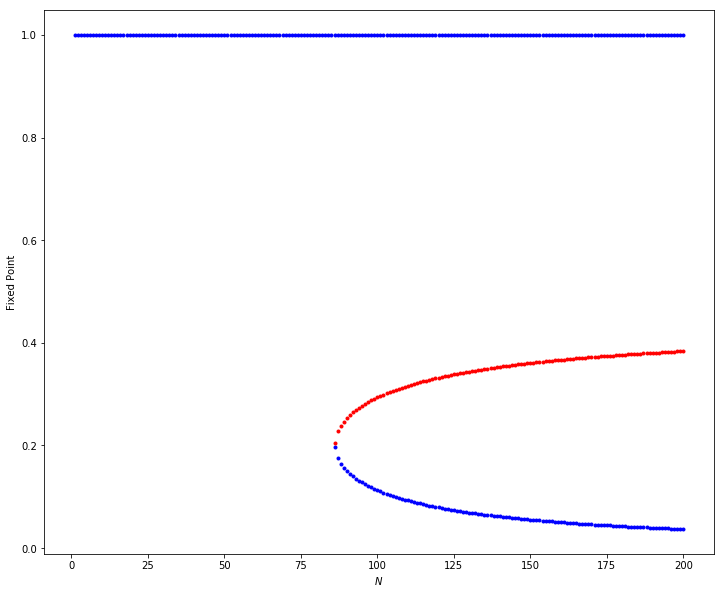

In [3]:
plt.figure(figsize=(12,10))

points_r = np.zeros((600,2))
points_b = np.zeros((600,2))
count_r = 0
count_b = 0

for NN in tqdm(np.linspace(1,200,200)):
    RR = [R[i].subs([(N,int(NN)), (Pm,0.025), (Pe,0.12), (delta,0.1), (v,0.7)]) for i in range(len(R))]
    JJ = [J0[i].subs([(N,int(NN)), (Pm,0.025), (Pe,0.12), (delta,0.1), (v,0.7)]) for i in range(len(R))]
    
    for i in range(len(RR)):
        if RR[i].is_real:
            if simplify(JJ[i]) < 0:
                points_b[count_b,0] = int(NN) 
                points_b[count_b,1] = RR[i]
                count_b += 1
            else:
                points_r[count_r,0] = int(NN) 
                points_r[count_r,1] = RR[i]
                count_r += 1
                
plt.plot(points_b[:count_b,0], points_b[:count_b,1], '.b')
plt.plot(points_r[:count_r,0], points_r[:count_r,1], '.r')

plt.xlabel('$N$')
plt.ylabel('Fixed Point')

plt.show()

np.savetxt('Bif_1D_N_a.dat',points_b)
np.savetxt('Bif_1D_N_b.dat',points_r)

### Fixed Points as a function of $P_m$

100%|██████████| 200/200 [00:12<00:00, 17.88it/s]


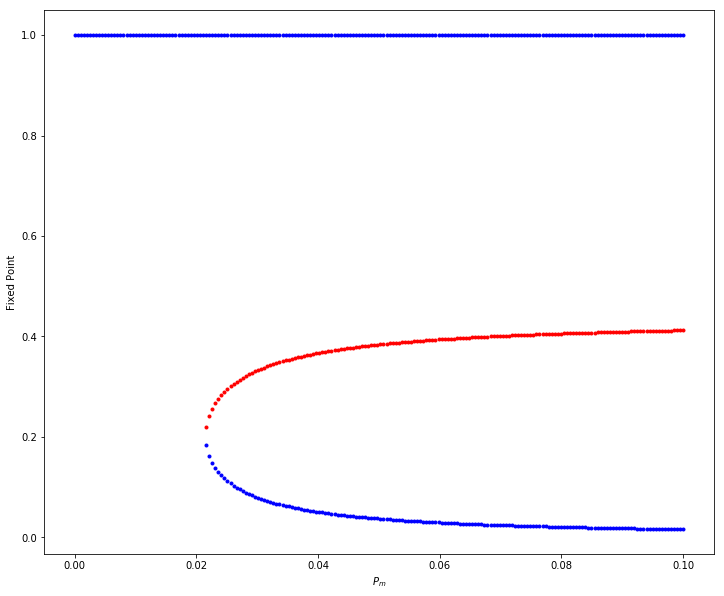

In [4]:
plt.figure(figsize=(12,10))

points_r = np.zeros((600,2))
points_b = np.zeros((600,2))
count_r = 0
count_b = 0

for PP in tqdm(np.linspace(0,0.1,200)):
    RR = [R[i].subs([(N,100), (Pm,PP), (Pe,0.12), (delta,0.1), (v,0.7)]) for i in range(len(R))]
    JJ = [J0[i].subs([(N,100), (Pm,PP), (Pe,0.12), (delta,0.1), (v,0.7)]) for i in range(len(R))]
    
    for i in range(len(RR)):
        if RR[i].is_real:
            if simplify(JJ[i]) < 0:
                points_b[count_b,0] = PP
                points_b[count_b,1] = RR[i]
                count_b += 1
            else:
                points_r[count_r,0] = PP
                points_r[count_r,1] = RR[i]
                count_r += 1
                
plt.plot(points_b[:count_b,0], points_b[:count_b,1], '.b')
plt.plot(points_r[:count_r,0], points_r[:count_r,1], '.r')

plt.xlabel('$P_m$')
plt.ylabel('Fixed Point')

plt.show()

np.savetxt('Bif_1D_Pm_a.dat',points_b)
np.savetxt('Bif_1D_Pm_b.dat',points_r)

### Fixed Points as a function of $P_e$

100%|██████████| 200/200 [00:08<00:00, 23.33it/s]


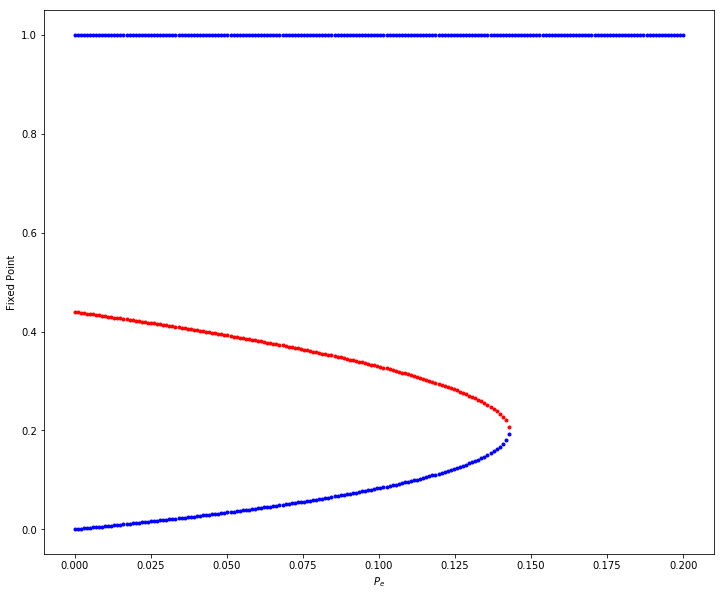

In [5]:
plt.figure(figsize=(12,10))

points_r = np.zeros((600,2))
points_b = np.zeros((600,2))
count_r = 0
count_b = 0

for PP in tqdm(np.linspace(0,0.2,200)):
    RR = [R[i].subs([(N,100), (Pm,0.025), (Pe,PP), (delta,0.1), (v,0.7)]) for i in range(len(R))]
    JJ = [J0[i].subs([(N,100), (Pm,0.025), (Pe,PP), (delta,0.1), (v,0.7)]) for i in range(len(R))]
    
    for i in range(len(RR)):
        if RR[i].is_real:
            if simplify(JJ[i]) < 0:
                points_b[count_b,0] = PP
                points_b[count_b,1] = RR[i]
                count_b += 1
            else:
                points_r[count_r,0] = PP
                points_r[count_r,1] = RR[i]
                count_r += 1
                
plt.plot(points_b[:count_b,0], points_b[:count_b,1], '.b')
plt.plot(points_r[:count_r,0], points_r[:count_r,1], '.r')

plt.xlabel('$P_e$')
plt.ylabel('Fixed Point')

np.savetxt('Bif_1D_Pe_a.dat',points_b)
np.savetxt('Bif_1D_Pe_b.dat',points_r)

plt.show()

### Fixed Points as a function of $v$

100%|██████████| 200/200 [00:02<00:00, 78.57it/s]


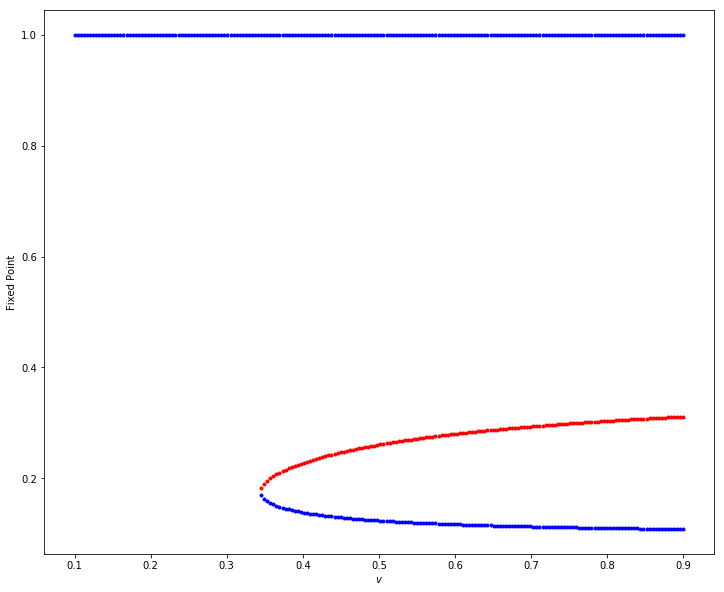

In [6]:
plt.figure(figsize=(12,10))

points_r = np.zeros((600,2))
points_b = np.zeros((600,2))
count_r = 0
count_b = 0

for PP in tqdm(np.linspace(0.1,0.9,200)):
    RR = [R[i].subs([(N,100), (Pm,0.025), (Pe,0.12), (delta,0.1), (v,PP)]) for i in range(len(R))]
    JJ = [J0[i].subs([(N,100), (Pm,0.025), (Pe,0.12), (delta,0.1), (v,PP)]) for i in range(len(R))]
    
    for i in range(len(RR)):
        if RR[i].is_real:
            if simplify(JJ[i]) < 0:
                points_b[count_b,0] = PP
                points_b[count_b,1] = RR[i]
                count_b += 1
            else:
                points_r[count_r,0] = PP
                points_r[count_r,1] = RR[i]
                count_r += 1
                
plt.plot(points_b[:count_b,0], points_b[:count_b,1], '.b')
plt.plot(points_r[:count_r,0], points_r[:count_r,1], '.r')

plt.xlabel('$v$')
plt.ylabel('Fixed Point')

np.savetxt('Bif_1D_v_a.dat',points_b)
np.savetxt('Bif_1D_v_b.dat',points_r)

plt.show()

### Fixed Points as a function of $\delta$

100%|██████████| 200/200 [00:04<00:00, 31.86it/s]


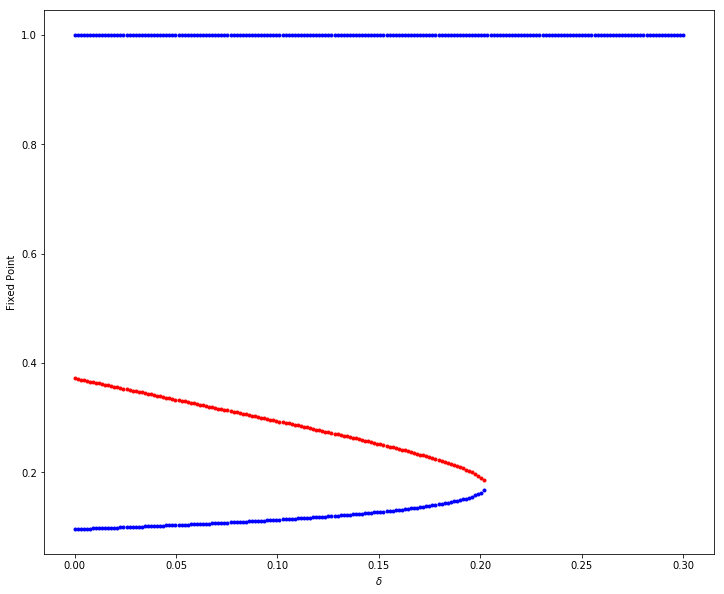

In [7]:
plt.figure(figsize=(12,10))

points_r = np.zeros((600,2))
points_b = np.zeros((600,2))
count_r = 0
count_b = 0

for PP in tqdm(np.linspace(0,0.3,200)):
    RR = [R[i].subs([(N,100), (Pm,0.025), (Pe,0.12), (delta,PP), (v,0.7)]) for i in range(len(R))]
    JJ = [J0[i].subs([(N,100), (Pm,0.025), (Pe,0.12), (delta,PP), (v,0.7)]) for i in range(len(R))]
    
    for i in range(len(RR)):
        if RR[i].is_real:
            if simplify(JJ[i]) < 0:
                points_b[count_b,0] = PP
                points_b[count_b,1] = RR[i]
                count_b += 1
            else:
                points_r[count_r,0] = PP
                points_r[count_r,1] = RR[i]
                count_r += 1
                
plt.plot(points_b[:count_b,0], points_b[:count_b,1], '.b')
plt.plot(points_r[:count_r,0], points_r[:count_r,1], '.r')

plt.xlabel('$\delta$')
plt.ylabel('Fixed Point')

np.savetxt('Bif_1D_delta_a.dat',points_b)
np.savetxt('Bif_1D_delta_b.dat',points_r)

plt.show()

### Regions of Adaptibility in $P_m$-$P_e$ space

In [8]:
points_r = np.zeros((40000,2))
points_b = np.zeros((40000,2))
count_r = 0
count_b = 0

for P1 in tqdm(np.linspace(0,0.1,200)):
    for P2 in np.linspace(0,0.2,200):
        RR = [R[i].subs([(N,100), (Pm,P1), (Pe,P2), (delta,0.1), (v,0.7)]) for i in range(len(R))]
        
        count_fp = 0
        for i in range(len(RR)):
            if RR[i].is_real:
                count_fp += 1
        if count_fp == 1:
            points_b[count_b,0] = P1
            points_b[count_b,1] = P2
            count_b += 1
        else:
            points_r[count_r,0] = P1
            points_r[count_r,1] = P2
            count_r += 1
            
np.savetxt('Bif_2D_Pm_Pe_a.dat',points_b)
np.savetxt('Bif_2D_Pm_Pe_b.dat',points_r)

100%|██████████| 200/200 [10:02<00:00,  2.83s/it]


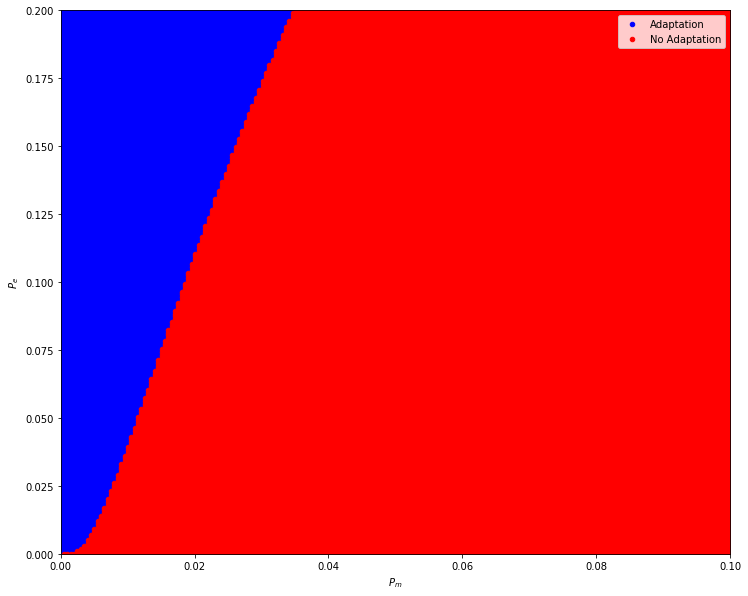

In [9]:
plt.figure(figsize=(12,10))
plt.plot(points_b[:count_b,0], points_b[:count_b,1], '.b', ms=9, label='Adaptation')
plt.plot(points_r[:count_r,0], points_r[:count_r,1], '.r', ms=9, label='No Adaptation')

plt.xlim((0,0.1))
plt.ylim((0,0.2))

plt.xlabel('$P_m$')
plt.ylabel('$P_e$')

plt.legend()
plt.show()

### Regions of Adaptibility in $N$-$P_m$ space

In [10]:
points_r = np.zeros((40000,2))
points_b = np.zeros((40000,2))
count_r = 0
count_b = 0

for P1 in tqdm(np.linspace(1,200,200)):
    for P2 in np.linspace(0,0.1,200):
        RR = [R[i].subs([(N,P1), (Pm,P2), (Pe,0.12), (delta,0.1), (v,0.7)]) for i in range(len(R))]
        
        count_fp = 0
        for i in range(len(RR)):
            if RR[i].is_real:
                count_fp += 1
        if count_fp == 1:
            points_b[count_b,0] = P1
            points_b[count_b,1] = P2
            count_b += 1
        else:
            points_r[count_r,0] = P1
            points_r[count_r,1] = P2
            count_r += 1
            
np.savetxt('Bif_2D_N_Pm_a.dat',points_b)
np.savetxt('Bif_2D_N_Pm_b.dat',points_r)

100%|██████████| 200/200 [18:08<00:00,  5.52s/it]


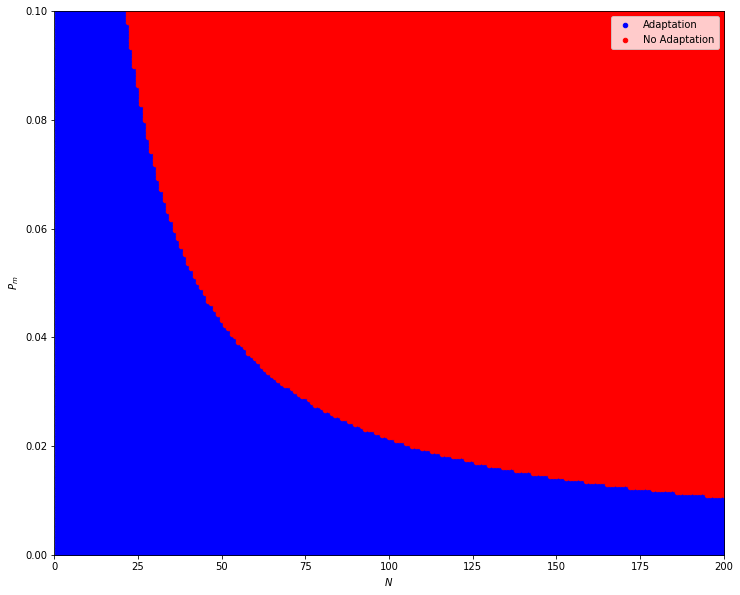

In [11]:
plt.figure(figsize=(12,10))
plt.plot(points_b[:count_b,0], points_b[:count_b,1], '.b', ms=9, label='Adaptation')
plt.plot(points_r[:count_r,0], points_r[:count_r,1], '.r', ms=9, label='No Adaptation')

plt.xlim((0,200))
plt.ylim((0,0.1))

plt.xlabel('$N$')
plt.ylabel('$P_m$')

plt.legend()
plt.show()

### Regions of Adaptibility in $\delta$-$v$ space

In [12]:
points_r = np.zeros((40000,2))
points_b = np.zeros((40000,2))
count_r = 0
count_b = 0

for P1 in tqdm(np.linspace(0,0.3,200)):
    for P2 in np.linspace(0.1,0.9,200):
        RR = [R[i].subs([(N,100), (Pm,0.025), (Pe,0.12), (delta,P1), (v,P2)]) for i in range(len(R))]
        
        count_fp = 0
        for i in range(len(RR)):
            if RR[i].is_real:
                count_fp += 1
        if count_fp == 1:
            points_b[count_b,0] = P1
            points_b[count_b,1] = P2
            count_b += 1
        else:
            points_r[count_r,0] = P1
            points_r[count_r,1] = P2
            count_r += 1

np.savetxt('Bif_2D_delta_v_a.dat',points_b)
np.savetxt('Bif_2D_delta_v_b.dat',points_r)

100%|██████████| 200/200 [02:54<00:00,  1.08s/it]


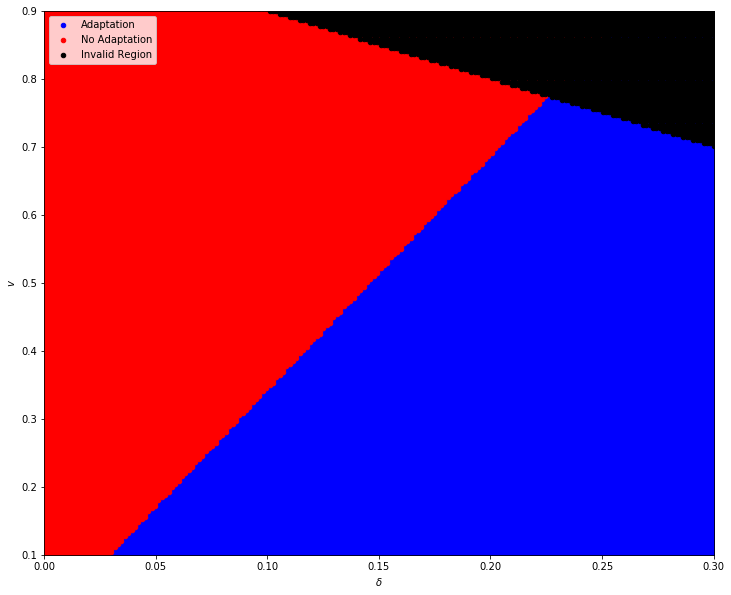

In [13]:
plt.figure(figsize=(12,10))

plt.plot(points_b[:count_b,0], points_b[:count_b,1], '.b', ms=9, label='Adaptation')
plt.plot(points_r[:count_r,0], points_r[:count_r,1], '.r', ms=9, label='No Adaptation')

xr = np.linspace(0,0.3,200)
yr = np.linspace(0.1,1.0,200)

points_k = np.zeros((40000,2))
count_k = 0

for x in xr:
    for y in yr:
        if y>1-x:
            points_k[count_k,0] = x
            points_k[count_k,1] = y
            count_k += 1
            
plt.plot(points_k[:count_k,0], points_k[:count_k,1], '.k', ms=9, label='Invalid Region')

plt.xlim((0,0.3))
plt.ylim((0.1,0.9))

plt.xlabel('$\delta$')
plt.ylabel('$v$')

plt.legend()
plt.show()

### Non-trivial Fixed Points in $\delta$-$v$ space

In [19]:
points_r = np.zeros((360000,3))
points_b = np.zeros((360000,3))
count_r = 0
count_b = 0

for P1 in tqdm(np.linspace(0,0.3,200)):
    for P2 in np.linspace(0.1,0.9,200):
        RR = [R[i].subs([(N,100), (Pm,0.025), (Pe,0.12), (delta,P1), (v,P2)]) for i in range(len(R))]
        JJ = [J0[i].subs([(N,100), (Pm,0.025), (Pe,0.12), (delta,P1), (v,P2)]) for i in range(len(R))]

        for i in range(len(RR)):
            if RR[i].is_real:
                if simplify(JJ[i]) < 0:
                    points_b[count_b,0] = P1
                    points_b[count_b,1] = P2
                    points_b[count_b,2] = RR[i]
                    count_b += 1
                else:
                    points_r[count_r,0] = P1
                    points_r[count_r,1] = P2
                    points_r[count_r,2] = RR[i]
                    count_r += 1
                    
np.savetxt('Bif_2D_delta_v_value_a.dat',points_b)
np.savetxt('Bif_2D_delta_v_value_b.dat',points_r)

100%|██████████| 200/200 [09:52<00:00,  3.66s/it]


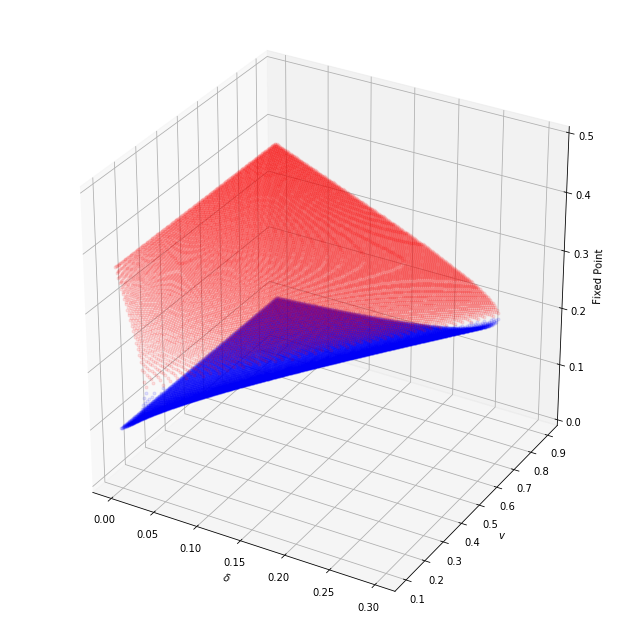

In [20]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
ax.plot(points_b[:count_b,0], points_b[:count_b,1], points_b[:count_b,2], '.b', alpha=0.1)
ax.plot(points_r[:count_r,0], points_r[:count_r,1], points_r[:count_r,2], '.r', alpha=0.1)

ax.set_xlabel('$\delta$')
ax.set_ylabel('$v$')
ax.set_zlabel('Fixed Point')

ax.set_zlim((0,0.5))

plt.tight_layout()
plt.show()

### Non-trivial Fixed Points in $P_m$-$v$ space

In [21]:
points_r = np.zeros((360000,3))
points_b = np.zeros((360000,3))
count_r = 0
count_b = 0

for P1 in tqdm(np.linspace(0,0.1,200)):
    for P2 in np.linspace(0.1,0.9,200):
        RR = [R[i].subs([(N,100), (Pm,P1), (Pe,0.12), (delta,0.1), (v,P2)]) for i in range(len(R))]
        JJ = [J0[i].subs([(N,100), (Pm,P1), (Pe,0.12), (delta,0.1), (v,P2)]) for i in range(len(R))]

        for i in range(len(RR)):
            if RR[i].is_real:
                if simplify(JJ[i]) < 0:
                    points_b[count_b,0] = P1
                    points_b[count_b,1] = P2
                    points_b[count_b,2] = RR[i]
                    count_b += 1
                else:
                    points_r[count_r,0] = P1
                    points_r[count_r,1] = P2
                    points_r[count_r,2] = RR[i]
                    count_r += 1
                    
np.savetxt('Bif_2D_Pm_v_value_a.dat',points_b)
np.savetxt('Bif_2D_Pm_v_value_b.dat',points_r)

100%|██████████| 200/200 [08:19<00:00,  2.19s/it]


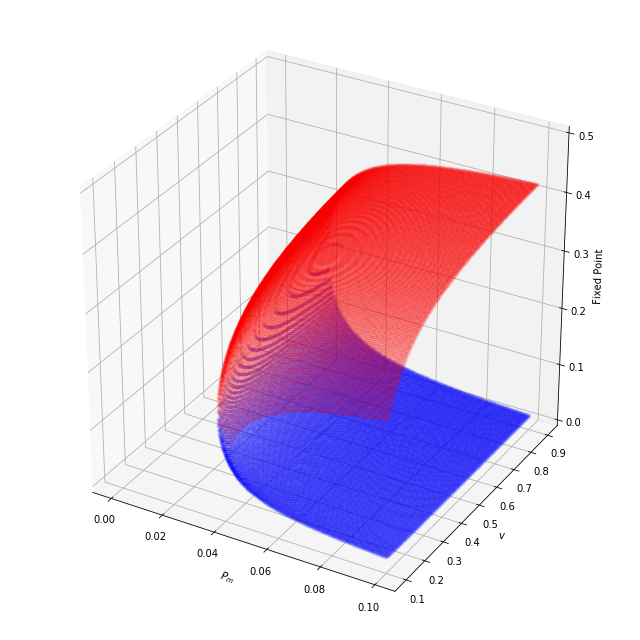

In [22]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
ax.plot(points_b[:count_b,0], points_b[:count_b,1], points_b[:count_b,2], '.b', alpha=0.1)
ax.plot(points_r[:count_r,0], points_r[:count_r,1], points_r[:count_r,2], '.r', alpha=0.1)

ax.set_xlabel('$P_m$')
ax.set_ylabel('$v$')
ax.set_zlabel('Fixed Point')

ax.set_zlim((0,0.5))

plt.tight_layout()
plt.show()